In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

data = pd.read_excel(r'Greenhouse gases.xlsx')
data = data[data.year >= 1990]

In [16]:
d=data.groupby(['year'])['co2.em'].mean().reset_index(name='co2.em').set_index('year')
d1=data.groupby(['year'])['ch4.em'].mean().reset_index(name='ch4.em').set_index('year')
d2=data.groupby(['year'])['n2o.em'].mean().reset_index(name='n2o.em').set_index('year')

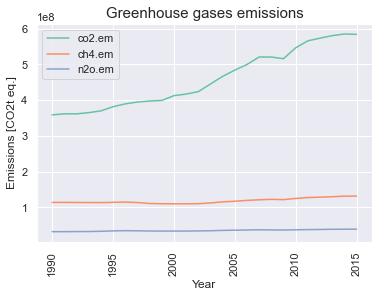

In [17]:
d['co2.em'].plot()
d1['ch4.em'].plot()
d2['n2o.em'].plot()
plt.xticks(rotation=90)
plt.title(f"Greenhouse gases emissions", size=15)
plt.xlabel('Year')
plt.ylabel('Emissions [CO2t eq.]')
plt.legend()
plt.show()

In [18]:
d3=data.groupby(['year'])['co2.cap'].mean().reset_index(name='co2.cap').set_index('year')
d4=data.groupby(['year'])['ch4.cap'].mean().reset_index(name='ch4.cap').set_index('year')
d5=data.groupby(['year'])['n2o.cap'].mean().reset_index(name='n2o.cap').set_index('year')

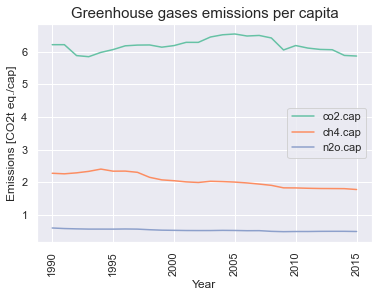

In [19]:
d3['co2.cap'].plot()
d4['ch4.cap'].plot()
d5['n2o.cap'].plot()
plt.xticks(rotation=90)
plt.title(f"Greenhouse gases emissions per capita", size=15)
plt.xlabel('Year')
plt.ylabel('Emissions [CO2t eq./cap]')
plt.legend()
plt.show()

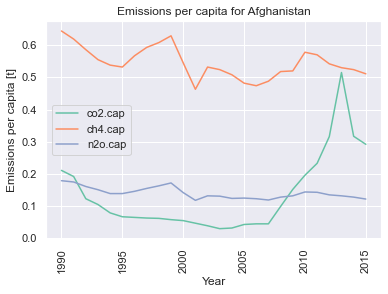

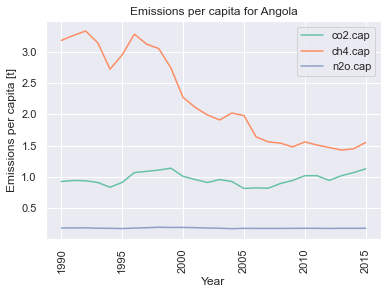

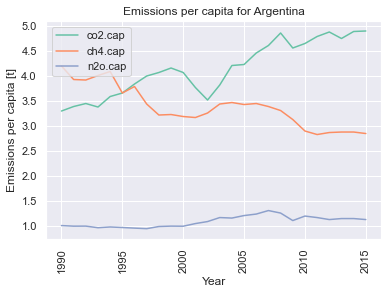

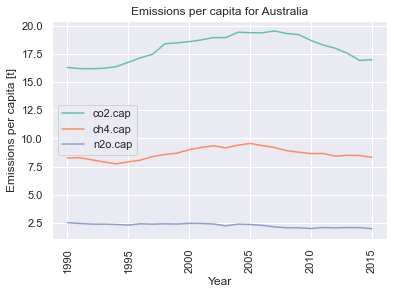

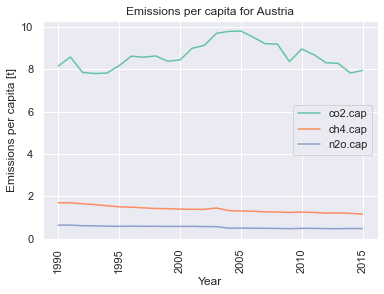

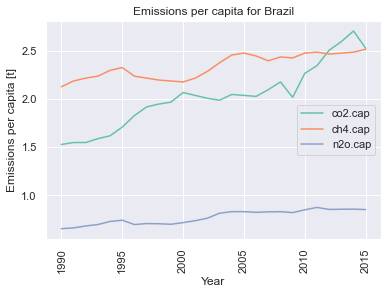

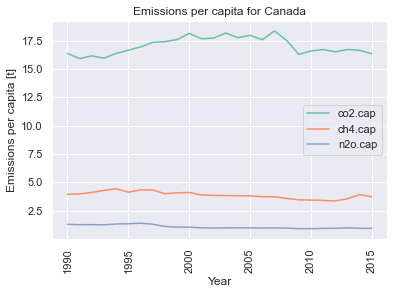

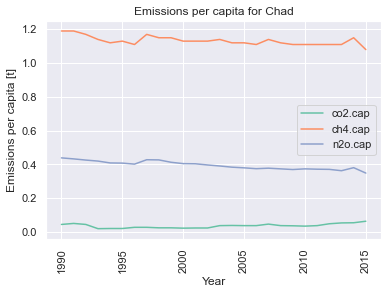

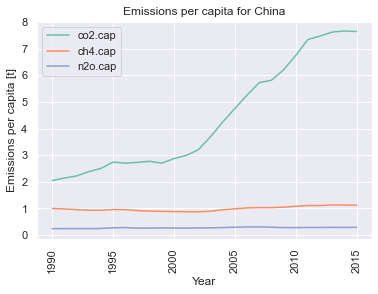

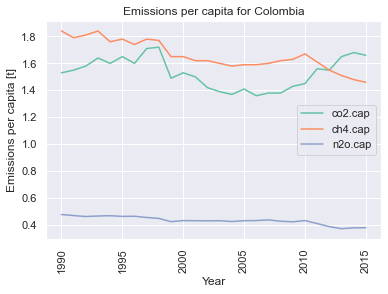

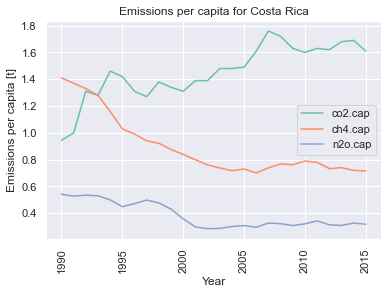

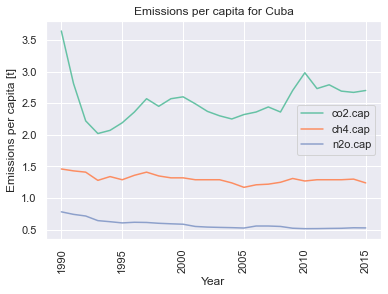

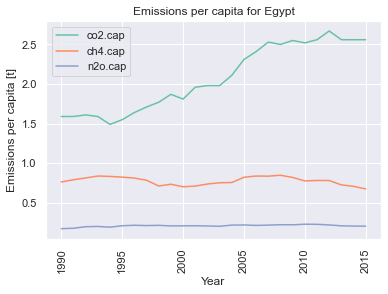

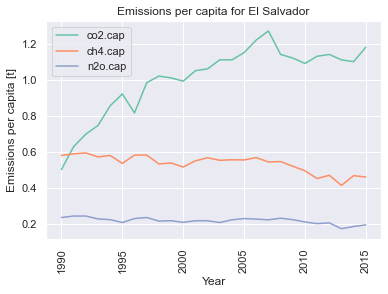

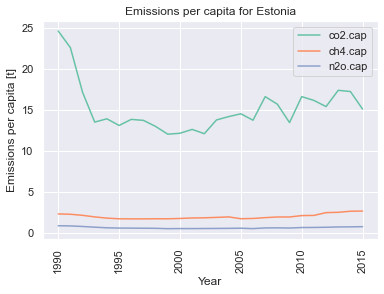

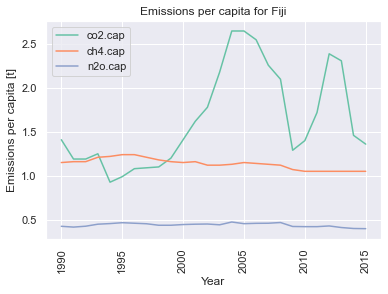

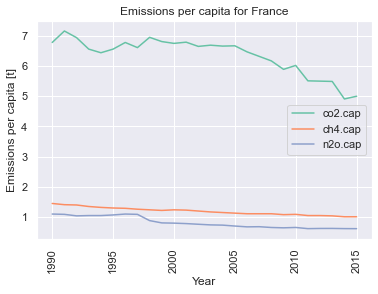

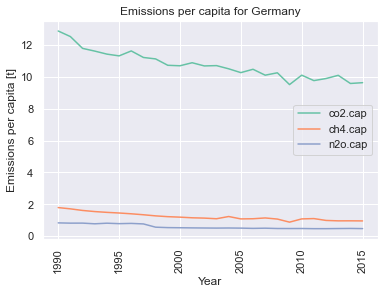

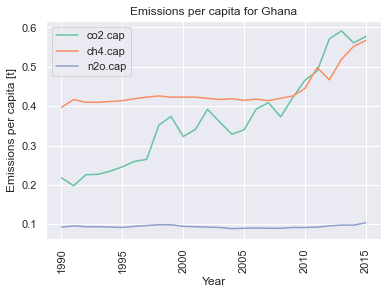

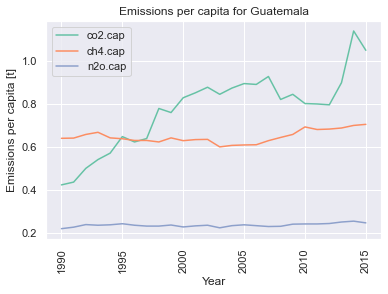

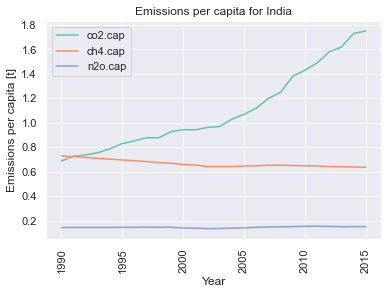

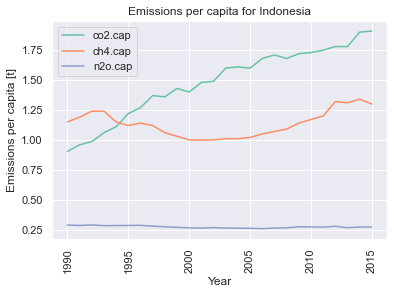

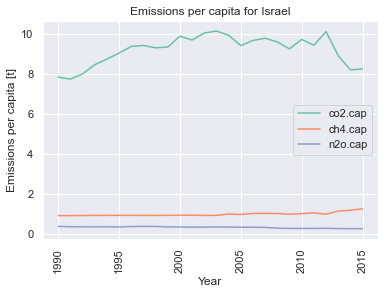

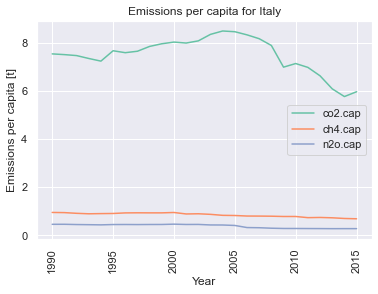

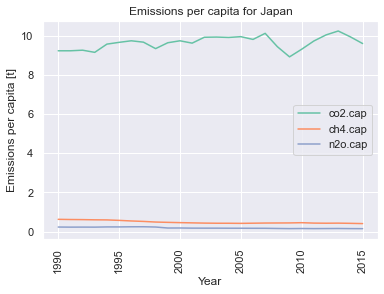

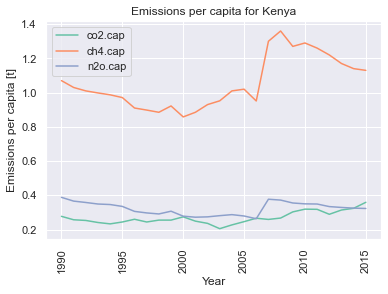

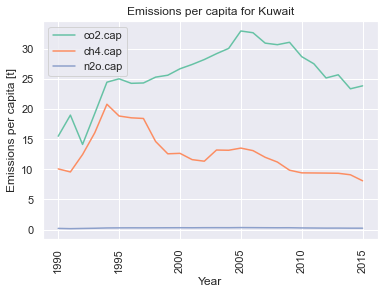

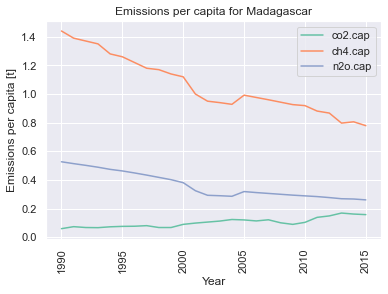

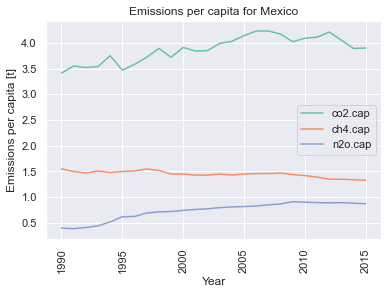

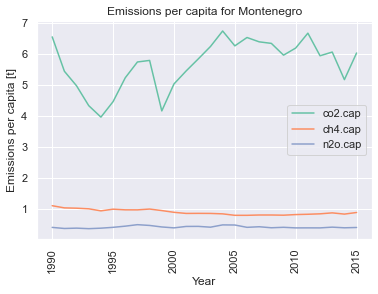

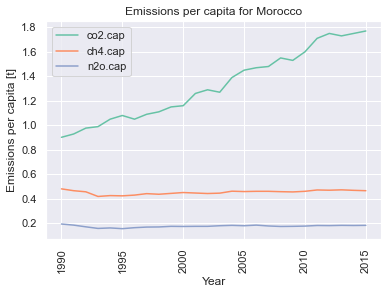

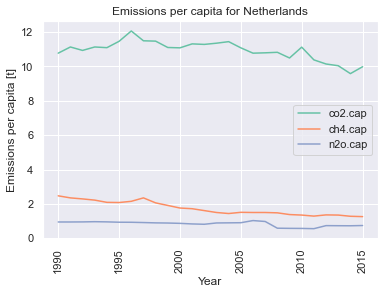

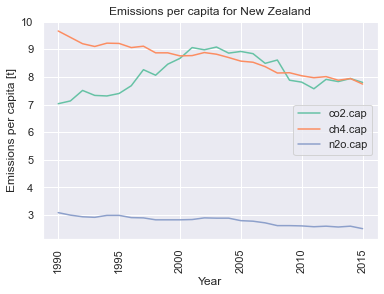

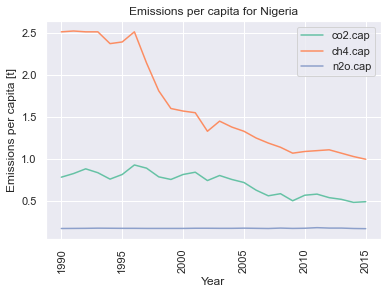

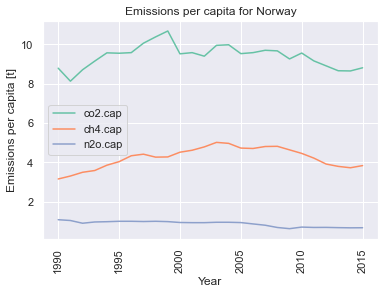

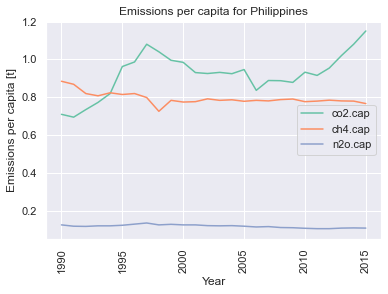

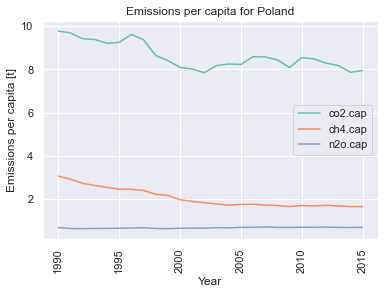

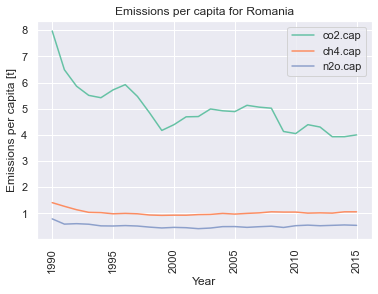

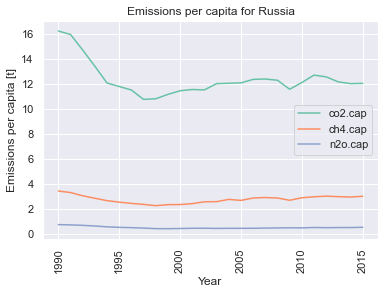

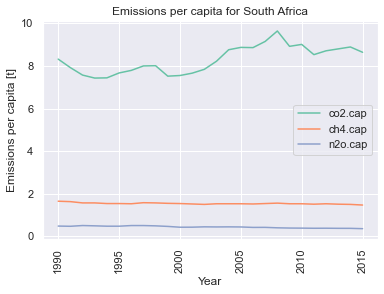

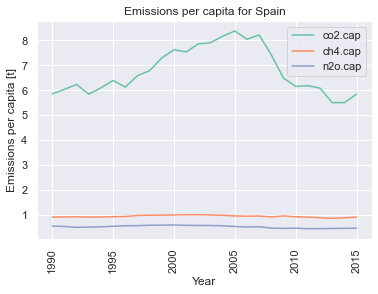

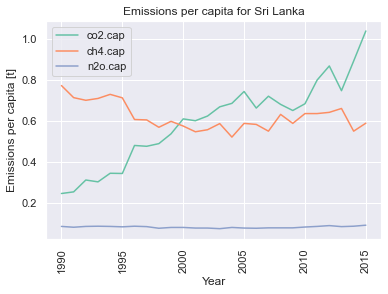

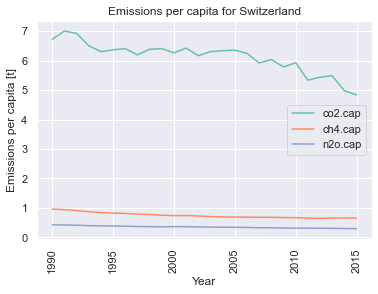

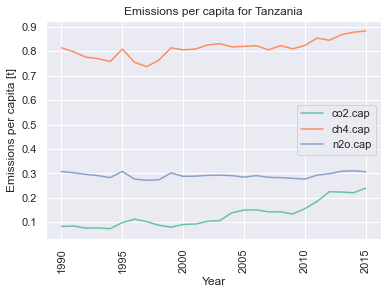

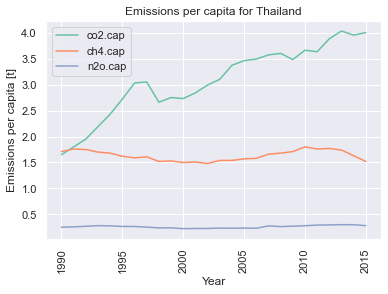

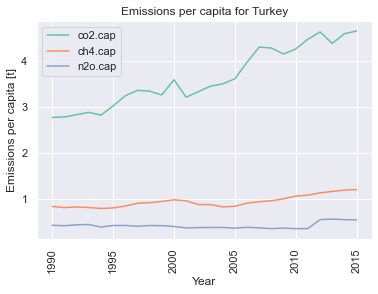

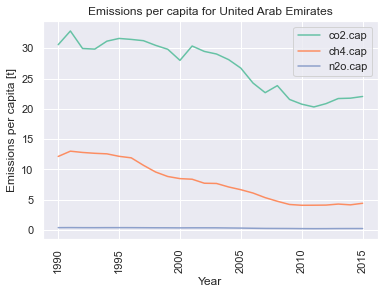

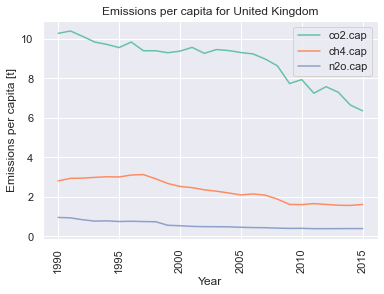

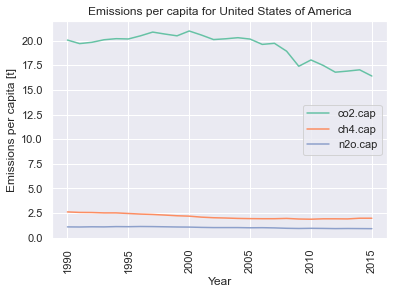

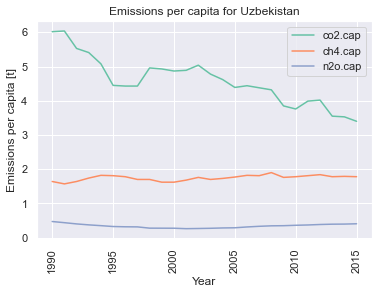

In [20]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['co2.cap'].plot()
    d['ch4.cap'].plot()
    d['n2o.cap'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Emissions per capita for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Emissions per capita [t]')
    plt.legend()
    plt.show()

In [21]:
conditions = [
    (data['co2.cap'] <= 4.8),
    (data['co2.cap'] > 4.8) & (data['co2.cap'] < 8.3),
    (data['co2.cap'] >= 8.3)]

choices = ['Sustainable', 'Quite sustainable', 'Not sustainable']
data['sust.level.ghg'] = np.select(conditions, choices)
data.to_excel(r'greenhouse_gases.xlsx')
data

,country,year,co2.em,ch4.em,n2o.em,ch4.cap,co2.cap,n2o.cap,sust.level.ghg
20,Afghanistan,1990,2582389,7883730,2196570,0.644,0.211,0.179,Sustainable
21,Afghanistan,1991,2490067,8038870,2277290,0.619,0.192,0.175,Sustainable
22,Afghanistan,1992,1717605,8189080,2256860,0.586,0.123,0.161,Sustainable
23,Afghanistan,1993,1578188,8379250,2274100,0.555,0.105,0.151,Sustainable
24,Afghanistan,1994,1284149,8702020,2251540,0.538,0.079,0.139,Sustainable
...,...,...,...,...,...,...,...,...,...
2295,Uzbekistan,2011,115985250,52687160,10724250,1.810,3.990,0.369,Sustainable
2296,Uzbekistan,2012,118627503,54309560,11301410,1.840,4.020,0.383,Sustainable
2297,Uzbekistan,2013,106538178,53285430,11753100,1.780,3.550,0.392,Sustainable
2298,Uzbekistan,2014,107638705,54513660,12038880,1.790,3.530,0.395,Sustainable


Text(0, 0.5, 'Number of countries')

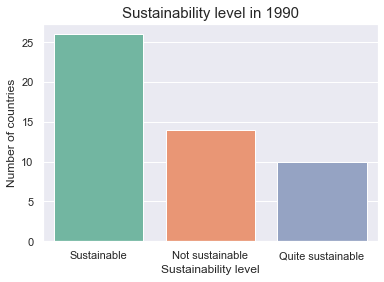

In [25]:
ghg1990 = data.loc[data['year'] == 1990]
ax = sns.countplot(x = "sust.level.ghg", data=ghg1990)
plt.title(f"Sustainability level in 1990", size=15)
plt.xlabel('Sustainability level')
plt.ylabel('Number of countries')

Text(0, 0.5, 'Number of countries')

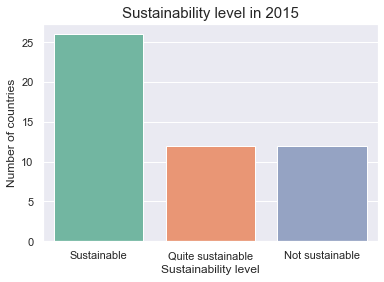

In [24]:
ghg1990 = data.loc[data['year'] == 2015]
ax = sns.countplot(x = "sust.level.ghg", data=ghg1990)
plt.title(f"Sustainability level in 2015", size=15)
plt.xlabel('Sustainability level')
plt.ylabel('Number of countries')